<b>Name: Ankit Pattanayak<br>
CSULB ID: 027646357` </b>

<b> In this assignment, we build a simple ANN model for a dataset and we explore some methods to optimize model parameters.</b>

### Sequence of operations:
1) Import libaries<br>
2) Loading data<br>
3) Feature-engineering<br>
4) Split data to train, validation and test data<br>
5) Tune params using GridSearchCV<br>
6) Apply model on validation data<br>
7) View confusion matrix on validation data<br>
8) If satisfied, apply model on test data<br>
9) View confusion matrix on test data<br>
10) Interpret the precision and recall values<br>
11) Draw loss curves for validation and test data<br>
12) Identify if the curves indicate overfitting problems<br>

<b>4- ANN project description<br>
Part 1 – Loading the required libraries and modules</b>

In [1]:
#Pandas
import pandas as pd

#Numpy
import numpy as np

#Mat-plot libary
import matplotlib.pyplot as plt

#SK-learn
import sklearn as sk

#Train-Test-Split
from sklearn.model_selection import train_test_split

#MLP Classifier
from sklearn.neural_network import MLPClassifier

#Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix

#Visual effects for confusion matrix
import seaborn as sns

<b>Part 2 – Reading the data and performing basic data checks<br>
1- Use describe() method of the dataframe (e.g df.describe()) to output the data
dimensions and fields basic stats.</b>

In [2]:
#Reading the data
data = pd.read_csv("diabetes.csv")

#Validate loading of data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Feature-engineering

In [3]:
#Feature-selection based on count of zeroes in data
zeroes = {}
for c in data.columns[:-1]:
    col_data = data[c].replace(0,np.nan)
    zeroes[c] = len(data)-col_data.count()
dict(sorted(zeroes.items(), key=lambda item: item[1]))

{'DiabetesPedigreeFunction': 0,
 'Age': 0,
 'Glucose': 5,
 'BMI': 11,
 'BloodPressure': 35,
 'Pregnancies': 111,
 'SkinThickness': 227,
 'Insulin': 374}

<b> Dropping SkinThickness, Insulin and Age columns due to the presence of excess of zeroes and due to the nature of data

In [4]:
data = data.drop(columns=["SkinThickness","Insulin","Age"])

<b> Part 3 – Creating the train and test datasets </b>

In [5]:
#Splitting dataset into input(X) and output(Y)
X = data.drop('Outcome', axis = 1)
Y = data['Outcome']

print("Inputs\n", X.head(2))
print("-"*70, "\nOutputs")
print(Y.head(2))

Inputs
    Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction
0            6      148             72  33.6                     0.627
1            1       85             66  26.6                     0.351
---------------------------------------------------------------------- 
Outputs
0    1
1    0
Name: Outcome, dtype: int64


<b>1- Split your data into train, test and, validation.<br>
2- Split your data based on the ratio of train = 0.75, validation = 0.15 and, test = 0.10<br>
3- Print out the total number of rows and the number of rows allocated for each<br>
category above.</b>

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25, random_state = 0)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.4, random_state = 0)
print(f"Total data:(100%)    {X.shape}")
print(f"Training data:(75%)  {X_train.shape}")
print(f"Testing data:(10%)   {X_test.shape}")
print(f"Validation data:(15%){X_val.shape}")

Total data:(100%)    (768, 5)
Training data:(75%)  (576, 5)
Testing data:(10%)   (77, 5)
Validation data:(15%)(115, 5)


<b>Part 4 – Building your model<br>
1- Use neural_network classifier to build your network. </b>

In [7]:
#Dummy classifier
clf = MLPClassifier()
clf

MLPClassifier()

<b>2- There are a few parameters needs to be adjusted in this model:<br>
a. Hidden_layer_sizes<br>
b. Activation<br>
c. Solver<br>
d. Batch_size<br>
e. Learning_rate<br>
f. Learning_rate_init</b>

<b> Using GridSearchCV to try params for better accuracy

In [8]:
#Adjust Params and applying GridSearchCV to try all combinations.

from sklearn.model_selection import GridSearchCV

param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
             ],
            'learning_rate_init':[0.08],
            'learning_rate':['adaptive'],
            'max_iter':[700]
        }
       ]
clf = GridSearchCV(MLPClassifier(), param_grid, cv=5,
                           scoring='accuracy')
clf.fit(X_train, Y_train)
best_params = clf.best_params_
print(best_params)

{'activation': 'identity', 'hidden_layer_sizes': (4,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.08, 'max_iter': 700, 'solver': 'adam'}


<b> Creating model based on best params decided above<br>
    Slightly tweaking hidden_layer_sizes to (3,) from 4 bumped up the accuracy

In [9]:
clf = MLPClassifier(hidden_layer_sizes=(3,), activation='identity', 
                    solver = 'adam',
                    learning_rate = 'adaptive',
                    learning_rate_init = 0.08,
                    random_state = 0,
                    max_iter=700)
clf.fit(X_train, Y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(3,),
              learning_rate='adaptive', learning_rate_init=0.08, max_iter=700,
              random_state=0)

<b>Validation: Running prediction on validation data

In [10]:
pred_val = clf.predict(X_val)

<b>Part 5 – Network metric and plots<br>
1- To evaluate your network, calculate confusion matrix.<br>
How do you interpret precision and recall?

Confusion Matrix on Validation Data


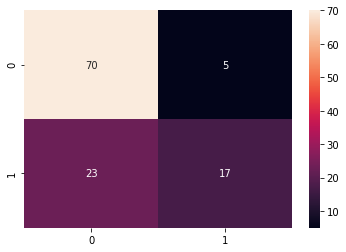

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        75
           1       0.77      0.42      0.55        40

    accuracy                           0.76       115
   macro avg       0.76      0.68      0.69       115
weighted avg       0.76      0.76      0.73       115



In [11]:
print("Confusion Matrix on Validation Data")
c = confusion_matrix(Y_val,pred_val)
sns.heatmap(c, annot=True, fmt="d")
plt.show()
print(classification_report(Y_val, pred_val))

<b>Observation: Considering accuracy and f1-score on validation data, this model's parameters seem fit. <br>
    Going ahead by applying model for test-data

In [12]:
pred_test = clf.predict(X_test)

<b> Drawing confusion matrix for test-data

Confusion Matrix on Test Data


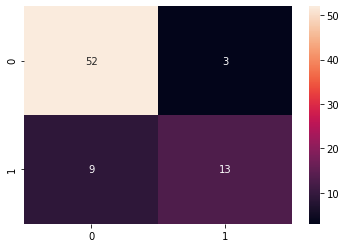

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        55
           1       0.81      0.59      0.68        22

    accuracy                           0.84        77
   macro avg       0.83      0.77      0.79        77
weighted avg       0.84      0.84      0.84        77



In [13]:
print("Confusion Matrix on Test Data")
c = confusion_matrix(Y_test,pred_test)
sns.heatmap(c, annot=True, fmt="d")
plt.show()
print(classification_report(Y_test, pred_test))

<b> Extracting parameters from confusion matrix of test-data

In [14]:
#Getting True Negatives, False Positives, False Negatives and True Postiives
TN, FP, FN, TP = c.ravel()

<b> Accuracy: (TP + TN) / (TN + FP + FN + TP) -- 84.42%

In [15]:
accuracy = ((TP + TN) / (TN + FP + FN + TP))*100.0
print(f"Accuracy is {accuracy:.2f}%")

Accuracy is 84.42%


<b> Precision: (true positives / predicted positives) = TP / TP + FP. - 81.25%

In [16]:
precision = (TP/(TP + FP))*100.0
print(f"Precision is {precision:.2f}%")

Precision is 81.25%


<b>Recall: TP/(TP + FN) --> 59.09%

In [17]:
recall = (TP/(TP + FN))*100.0
print(f"Recall is {recall:.2f}%")

Recall is 59.09%


<b>Interpretation: <br>
   1. Precision of 81.25% indicates that this model correctly predicted 81 diabetic outcomes out of 100. We can safely trust its positive prediction most of the times.<br>
   2. Recall of 59.09% indicates that this model is capable to predict 60 diabetic outcomes out of 100 actual diabetic outcomes. This is fairly accurate as well.

<b>2- Plot error plot for each iteration (epoch) for both validate and train.<br>
Based on your parameter setting you may see an overfitting problem. Try to spot it if that’s happened.<br>
    3- Once you finish your parameter tunning, run your model on your test data set and create
a plot for your test the same as previous step

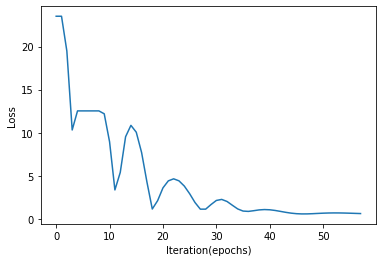

In [18]:
#For validation data
clf.fit(X_val, Y_val)
plt.xlabel("Iteration(epochs)")
plt.ylabel("Loss")
plt.plot(clf.loss_curve_)
plt.show()

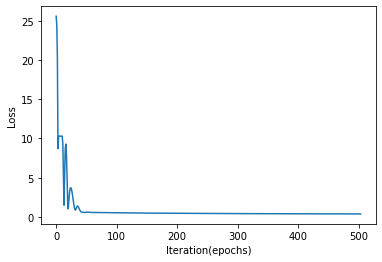

In [19]:
#For test data
clf.fit(X_test, Y_test)
plt.xlabel("Iteration(epochs)")
plt.ylabel("Loss")
plt.plot(clf.loss_curve_)
plt.show()

<b>Observation showing overfitting problem:</b>
1) This model has a high validation loss at the beginning but gradually decreases upon adding training data <br>
2) This model's training and validation loss are a lot different from each other.<br>